<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/MnistKerasAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Autoencoder - Keras
* Using Mnist
* Input Images are 28 x 28 (784)
* Encoder will compress   784 -> Depth
* Decoder will decompress Depth -> 784

# Setup

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist

from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

# Import Images

In [0]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test  = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


# Functions

## Define Autoencoder
* We start with 128 and decide how many layers
* Each layer will cut the number of nodes in 2
* For example two compression layers will:

Input (784) -> (128), (128) -> (64), (64) -> (32) -->

                                    |

Output (784) <- (128), (128) <- (64), (64) <- (32) <--

In [0]:
def generateLayers(depth):
  if depth < 0 or depth > 4:
    raise('Depth must be within 0 and 4')
    
  input_img = Input(shape=(784, ))

  encoded = Dense(units=128, activation='relu')(input_img)
  nodes = 128
  for l in range(depth):  
    nodes /= 2
    encoded = Dense(units=int(nodes),  activation='relu')(encoded)

  decoded = encoded
  for l in range(depth):
    nodes *= 2  
    decoded = Dense(units=int(nodes),  activation='relu')(decoded)
  decoded = Dense(units=784, activation='sigmoid')(decoded)

  return input_img, decoded, encoded

## Define Model

In [0]:
def defineModel(depth=2):
  input_img, decoded, encoded = generateLayers(depth)
  autoencoder = Model(input_img, decoded)
  encoder     = Model(input_img, encoded)
  print(autoencoder.summary())
  print(encoder.summary())
  return autoencoder, encoder

## Compile & Fit
* We want our input = output (perfect encode and decode)

In [0]:
def compileAndFit(autoencoder):
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  autoencoder.fit(X_train, X_train, 
                  epochs=50, batch_size=256, shuffle=True, 
                  validation_data=(X_test, X_test))

## Predict & Illustrate

In [0]:
def predict(autoencoder, encoder):
  encoded_imgs = encoder.predict(X_test)
  predicted    = autoencoder.predict(X_test)
  
  plt.figure(figsize=(40, 4))
  encoded_size = len(encoded_imgs[0])
  encoded_y = int(encoded_size / 4)
  encoded_x = int(encoded_size / encoded_y)

  for i in range(10):
    # Original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(encoded_y, encoded_x))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed
    ax = plt.subplot(3, 20, i + 1 + 40)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Build Models

## Build Model (128 Node Compression)

In [0]:
autoencoder128, encoder128 = defineModel(depth=0)
compileAndFit(autoencoder128)

Model: "model_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_213 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_214 (Dense)            (None, 784)               101136    
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_213 (Dense)            (None, 128)               100480    
Total params: 100,480
Trainab

## Build Model (64 Node Compression)

In [0]:
autoencoder64, encoder64 = defineModel(depth=1)
compileAndFit(autoencoder64)

Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_201 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_202 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_203 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_204 (Dense)            (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_52"
_________________________________________________________________
Layer (type)                 

## Build Model (32 Node Compression)

In [0]:
autoencoder32, encoder32 = defineModel(depth=2)
compileAndFit(autoencoder32)

Model: "model_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_179 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_180 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_181 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_182 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_183 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_184 (Dense)            (None, 784)               101

## Build Model (16 Node Compression)

In [0]:
autoencoder16, encoder16 = defineModel(depth=3)
compileAndFit(autoencoder16)

Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_185 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_186 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_187 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_188 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_189 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_190 (Dense)            (None, 64)                211

## Build Model (8 Node Compression)

In [0]:
autoencoder8, encoder8 = defineModel(depth=4)
compileAndFit(autoencoder8)

Model: "model_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_215 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_216 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_217 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_218 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_219 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_220 (Dense)            (None, 16)                144

# Model Comparison
* Last layer # of Nodes

## 128 Node

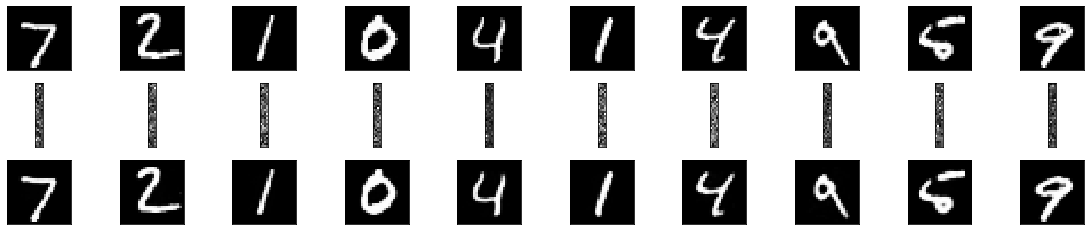

In [0]:
predict(autoencoder128, encoder128)

## 64 Node

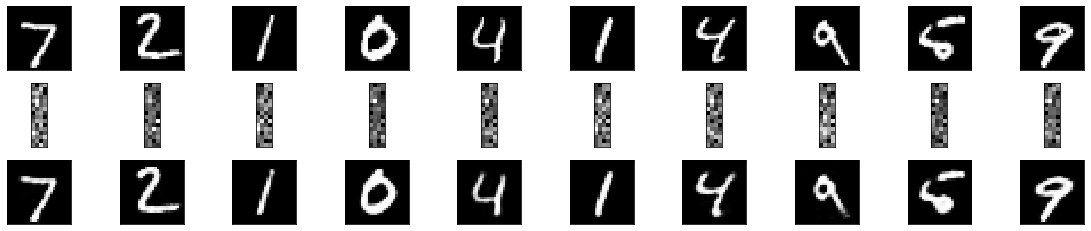

In [0]:
predict(autoencoder64, encoder64)

## 32 Node

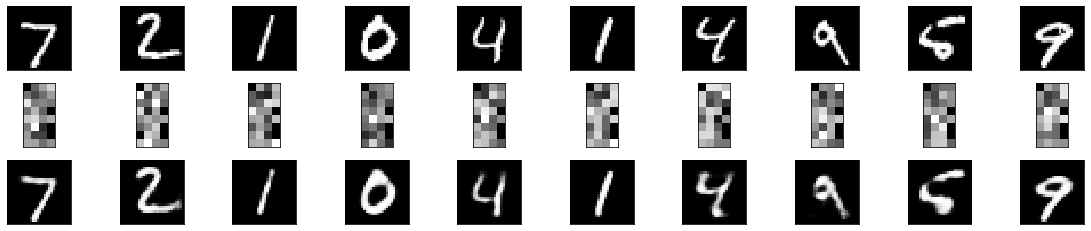

In [0]:
predict(autoencoder32, encoder32)

## 16 Node

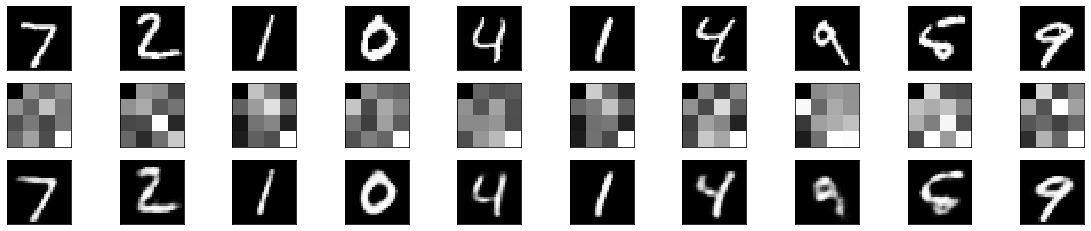

In [0]:
predict(autoencoder16, encoder16)

## 8 Node

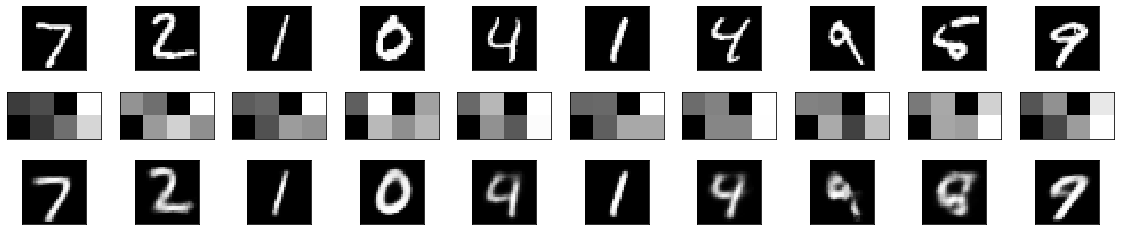

In [0]:
predict(autoencoder8, encoder8)